In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
# Set matplotlib font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Colour blind friendly colour palette
# plt.style.use('tableau-colorblind10')

In [89]:
df = pd.read_csv("times-laptop.csv")
# to numeric
df = df.apply(pd.to_numeric, errors='coerce')
df.head(15)

speedup_df = pd.DataFrame()

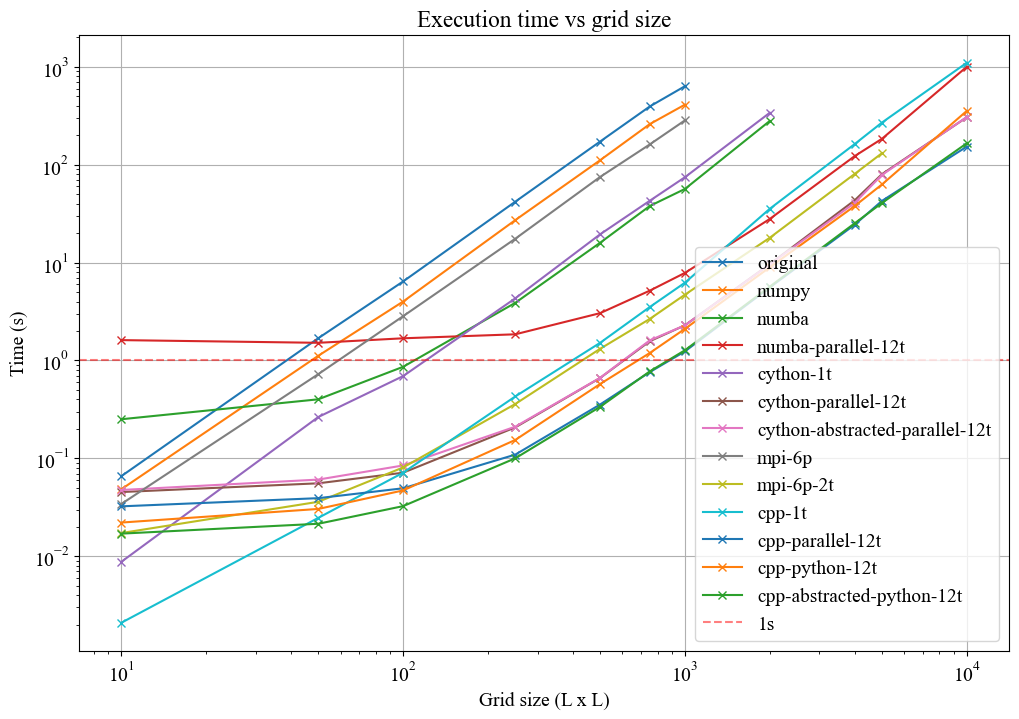

In [90]:
# y and x axis log and an horizontal line at t = 1
ax = df.plot(x="nmax", marker="x", 
        logx=True, logy=True, grid=True, 
        title="Execution time vs grid size", ylabel="Time (s)", xlabel="Grid size (L x L)", 
        legend=True, figsize=(12, 8),
        # ylim=(df.min()[1:].min(),df.max()[1:].max()),
        # xlim=(df.min()[0].min(),df.max()[0].min())
)
ax.axhline(1, color="red", linestyle="--", label="1s", alpha=0.5)

ax.legend()

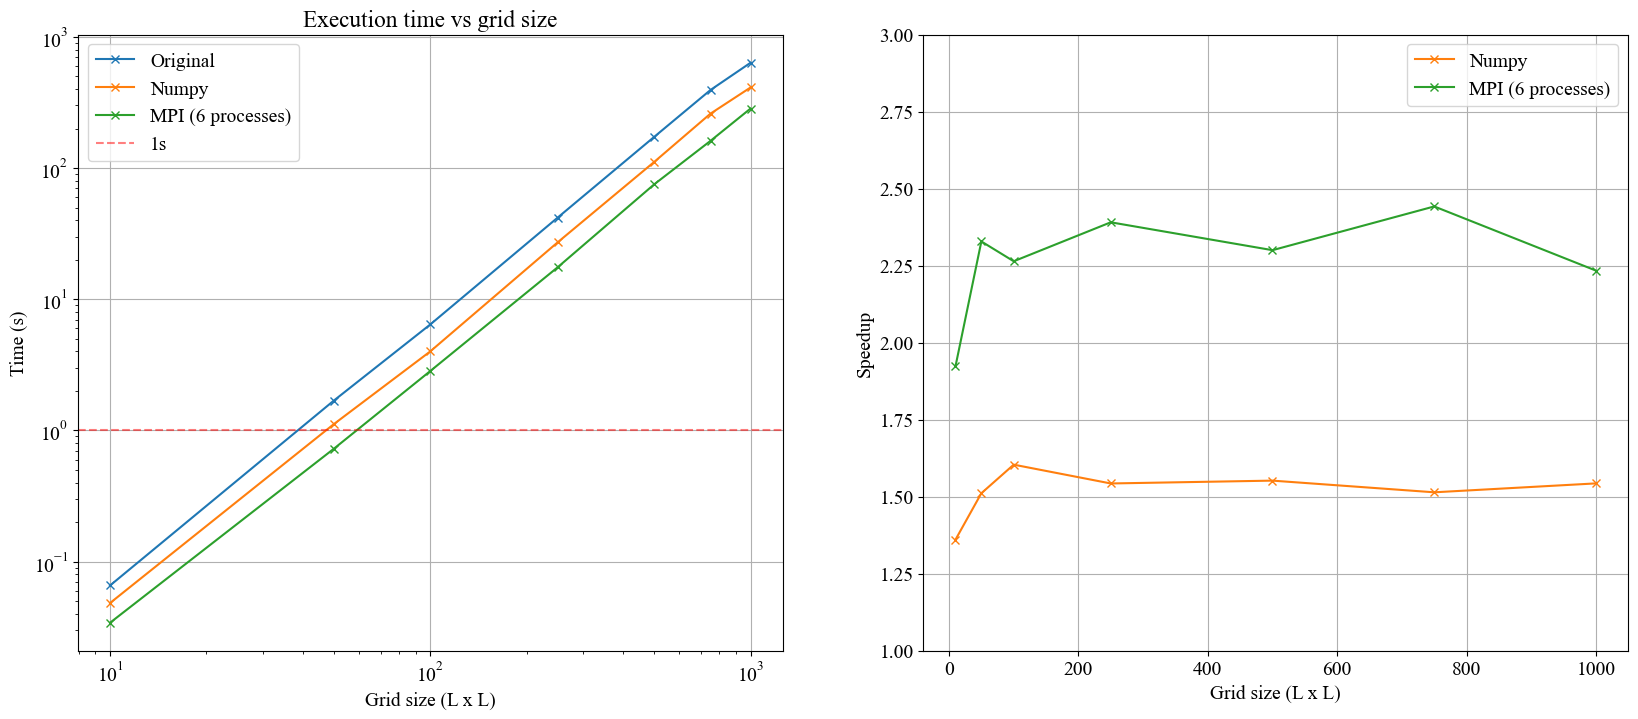

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

y = ["original", "numpy", "mpi-6p"]
y_labels = ["Original", "Numpy", "MPI (6 processes)"]
df.plot(ax=ax[0],
        x="nmax", y=y,
        label=y_labels,
        marker="x", 
        logx=True, logy=True, grid=True, 
        title="Execution time vs grid size", ylabel="Time (s)", xlabel="Grid size (L x L)", 
        legend=True,
)
ax[0].axhline(1, color="red", linestyle="--", label="1s", alpha=0.5)
ax[0].legend()

speedup_numpy = df["original"] / df[y[1]]
speedup_mpi = df["original"] / df[y[2]]
xvalues = df["nmax"].values

speedup_df["nmax"] = xvalues
speedup_df["numpy"] = speedup_numpy
speedup_df["mpi-6p"] = speedup_mpi

ax[1].plot(xvalues,speedup_numpy, marker="x", label=y_labels[1], color="tab:orange")
ax[1].plot(xvalues,speedup_mpi, marker="x", label=y_labels[2], color="tab:green")
ax[1].set_ylim(1, 3)
ax[1].set_xlabel("Grid size (L x L)")
ax[1].set_ylabel("Speedup") 
ax[1].grid()
ax[1].legend()

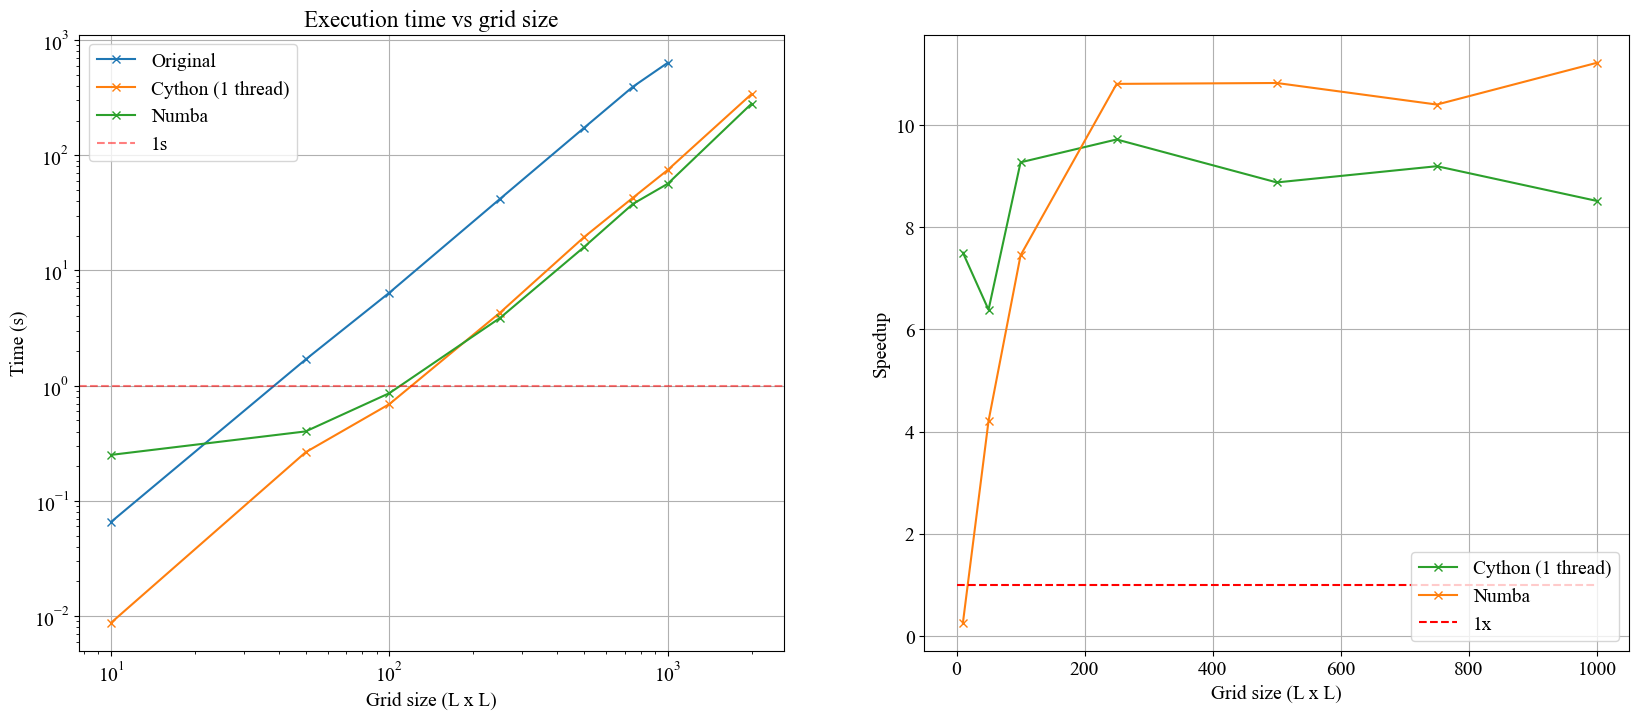

In [98]:
# Numba speedup
y = ["original","cython-1t","numba", "cpp-1t"]
y_labels = ["Original", "Cython (1 thread)", "Numba", "C++ (1 thread)"]
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

df.plot(ax=ax[0],
        x="nmax", y=y[:-1],
        label=y_labels[:-1],
        marker="x", 
        logx=True, logy=True, grid=True, 
        title="Execution time vs grid size", ylabel="Time (s)", xlabel="Grid size (L x L)", 
        legend=True,
)
ax[0].axhline(1, color="red", linestyle="--", label="1s", alpha=0.5)
ax[0].legend()

speedup_cython = df["original"] / df[y[1]]
speedup_numba = df["original"] / df[y[2]]
speedup_cpp = df["original"] / df[y[3]]

speedup_df["cython-1t"] = speedup_cython
speedup_df["numba-1t"] = speedup_numba
speedup_df["cpp-1t"] = speedup_cpp

ax[1].plot(df["nmax"],speedup_cython, marker="x", label=y_labels[1], color="tab:green")
ax[1].plot(df["nmax"],speedup_numba, marker="x", label=y_labels[2], color="tab:orange")
ax[1].hlines(1, 0, 1000, color="red", linestyle="--", label="1x")
ax[1].set_xlabel("Grid size (L x L)")
ax[1].set_ylabel("Speedup") 
ax[1].grid()
ax[1].legend()

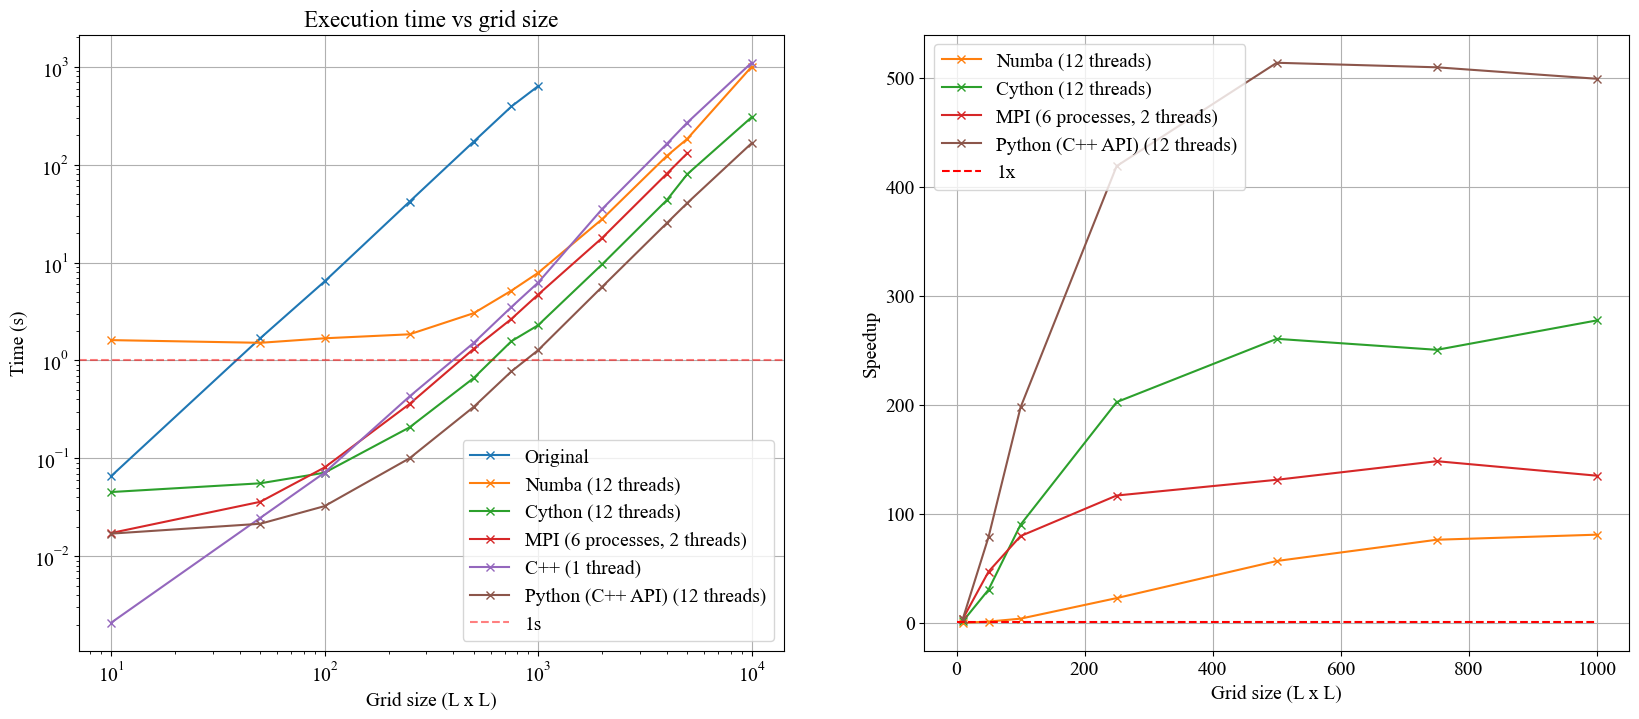

In [99]:
# Cython speedup
y = ["original","numba-parallel-12t","cython-parallel-12t", "mpi-6p-2t", "cpp-1t", "cpp-abstracted-python-12t"]
y_labels = ["Original", "Numba (12 threads)", "Cython (12 threads)", "MPI (6 processes, 2 threads)", "C++ (1 thread)", "Python (C++ API) (12 threads)"]
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

df.plot(ax=ax[0],
        x="nmax", y=y,
        label=y_labels,
        marker="x", 
        logx=True, logy=True, grid=True, 
        title="Execution time vs grid size", ylabel="Time (s)", xlabel="Grid size (L x L)", 
        legend=True,
)
ax[0].axhline(1, color="red", linestyle="--", label="1s", alpha=0.5)
ax[0].legend()

speedup_numba = df["original"] / df[y[1]]
speedup_cython = df["original"] / df[y[2]]
speedup_mpi = df["original"] / df[y[3]]
speedup_cppapi = df["original"] / df[y[5]]

speedup_df["numba-parallel-12t"] = speedup_numba
speedup_df["cython-parallel-12t"] = speedup_cython
speedup_df["mpi-6p-2t"] = speedup_mpi
speedup_df["cpp-1t"] = df["original"] / df[y[4]]
speedup_df["cpp-pythonapi-12t"] = speedup_cppapi

ax[1].plot(df["nmax"],speedup_numba, marker="x", label=y_labels[1], color="tab:orange")
ax[1].plot(df["nmax"],speedup_cython, marker="x", label=y_labels[2], color="tab:green")
ax[1].plot(df["nmax"],speedup_mpi, marker="x", label=y_labels[3], color="tab:red")
ax[1].plot(df["nmax"],speedup_cppapi, marker="x", label=y_labels[5], color="tab:brown")
ax[1].hlines(1, 0, 1000, color="red", linestyle="--", label="1x")
ax[1].set_xlabel("Grid size (L x L)")
ax[1].set_ylabel("Speedup") 
ax[1].grid()
ax[1].legend()

<Axes: xlabel='nmax'>

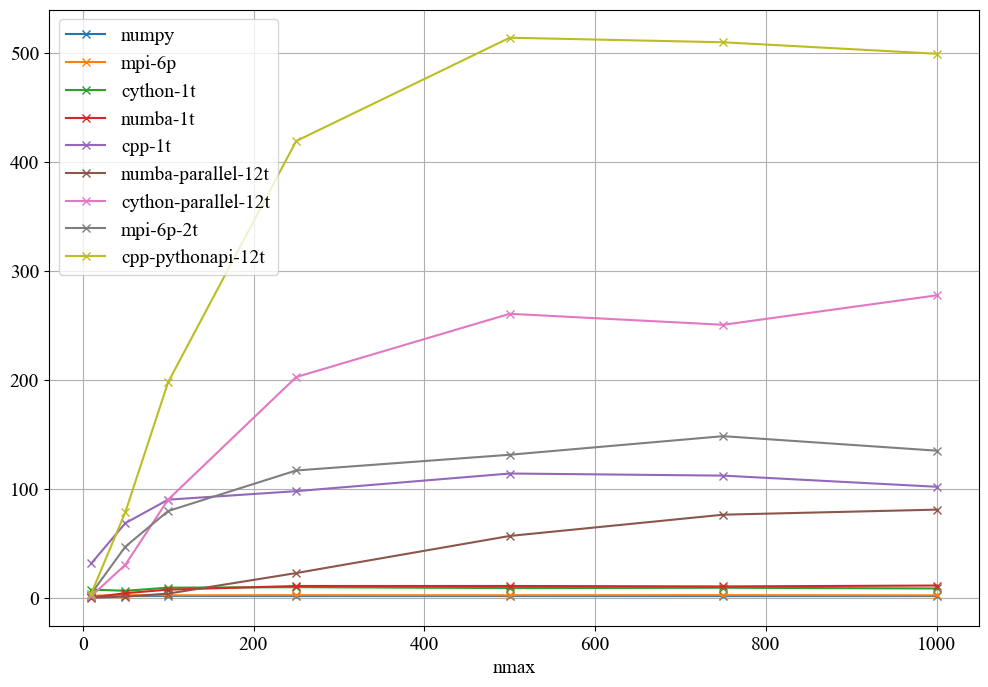

In [101]:
speedup_df.plot(x="nmax", marker="x",figsize=(12, 8), grid=True)